In [15]:
import json
import os
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [20]:
json_folder = '../../data/papers_with_openalex_and_openaire_categories_aligned'
openalex_categories = set()
openaire_categories = set()
paper_count = 0
cat_per_paper = [] #pairs of belonging openalex and openaire categories

In [7]:
filenames = os.listdir(json_folder)
filenames.sort()

In [21]:
for file in filenames:
    # Check if the file is a JSON file
    if file.endswith(".json"):
        file_path = os.path.join(json_folder, file)
        with open(file_path, 'r') as f:
            data = json.load(f)
            # Iterate through each paper in the JSON file
            for paper in data:
                paper_count += 1
                # Add categories to respective sets
                openalex_categories.update(data[paper].get('openalex', []))
                openaire_categories.update(data[paper].get('openaire', []))
                cat_per_paper.append((len(data[paper].get('openalex', [])), len(data[paper].get('openaire', []))))

In [11]:
print(f'# papers: {paper_count}')
print(f'# openalex categories: {len(openalex_categories)}')
print(f'# openaire categories: {len(openaire_categories)}')
print(f'# all categories: {len(openalex_categories.union(openaire_categories))}')
print(f'# overlapping categories: {len(openalex_categories.intersection(openaire_categories))}')

# papers: 109677
# openalex categories: 30744
# openaire categories: 111309
# all categories: 114599
# overlapping categories: 27454


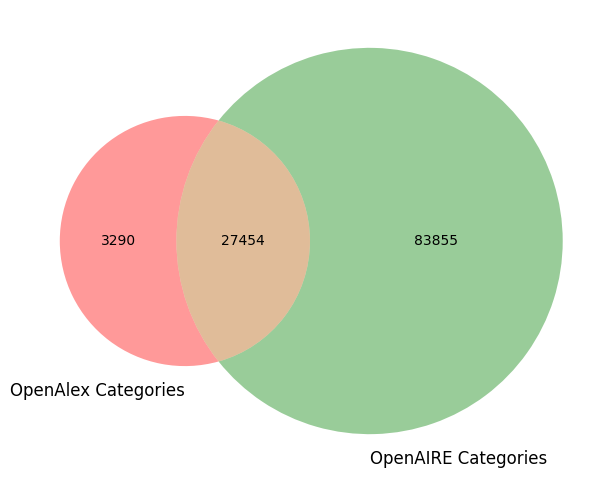

<Figure size 640x480 with 0 Axes>

In [19]:

labels = ['OpenAlex Categories', 'OpenAIRE Categories']
common_categories = openalex_categories.intersection(openaire_categories)

plt.figure(figsize=(8, 6))
venn = venn2(subsets=(len(openalex_categories), len(openaire_categories), len(common_categories)), set_labels=labels)

# Add count of elements in each subset
venn.get_label_by_id('10').set_text(f"{len(openalex_categories) - len(common_categories)}")
venn.get_label_by_id('01').set_text(f"{len(openaire_categories) - len(common_categories)}")
venn.get_label_by_id('11').set_text(f"{len(common_categories)}")

plt.show()

In [22]:
openalex_cat_sum = 0
openaire_cat_sum = 0

for tup in cat_per_paper:
    openalex_cat_sum += tup[0]
    openaire_cat_sum += tup[1]

print(f"Sum of all OpenAlex categories that the papers have: {openalex_cat_sum}")
print(f"Sum of all OpenAIRE categories that the papers have: {openaire_cat_sum}")
print(f"AVG OpenAlex categories that the papers have: {openalex_cat_sum/paper_count}")
print(f"AVG OpenAIRE categories that the papers have: {openaire_cat_sum/paper_count}")

Sum of all OpenAlex categories that the papers have: 1937894
Sum of all OpenAIRE categories that the papers have: 2345271
AVG OpenAlex categories that the papers have: 17.669101087739453
AVG OpenAIRE categories that the papers have: 21.38343499548675


In [23]:
openalex_category_counts = {}
openaire_category_counts = {}

In [31]:
for file in filenames:
    if file.endswith(".json"):
        file_path = os.path.join(json_folder, file)
        with open(file_path, 'r') as f:
            data = json.load(f)
            for paper in data:
                data[paper].get('openalex', [])
                for category in data[paper].get('openalex', []):
                    if category in openalex_category_counts.keys():
                        openalex_category_counts[category] += 1
                    else:
                        openalex_category_counts[category] = 1
                for category in data[paper].get('openaire', []):
                    if category in openaire_category_counts.keys():
                        openaire_category_counts[category] += 1
                    else:
                        openaire_category_counts[category] = 1

In [29]:
openaire_category_counts

{}

In [54]:
openalex_categories_freq = set()
openaire_categories_freq = set()

threshold = 10

for category, count in openalex_category_counts.items():
    if count > threshold:
        openalex_categories_freq.add(category)

for category, count in openaire_category_counts.items():
    if count > threshold:
        openaire_categories_freq.add(category)

print(f'# openalex categories appearing more then {threshold}: {len(openalex_categories_freq)}')
print(f'# openaire categories  appearing more then {threshold}: {len(openaire_categories_freq)}')
print(f'# all categories  appearing more then {threshold}: {len(openalex_categories_freq.union(openaire_categories_freq))}')
print(f'# overlapping categories  appearing more then {threshold}: {len(openalex_categories_freq.intersection(openaire_categories_freq))}')

# openalex categories appearing more then 10: 12642
# openaire categories  appearing more then 10: 22462
# all categories  appearing more then 10: 24102
# overlapping categories  appearing more then 10: 11002


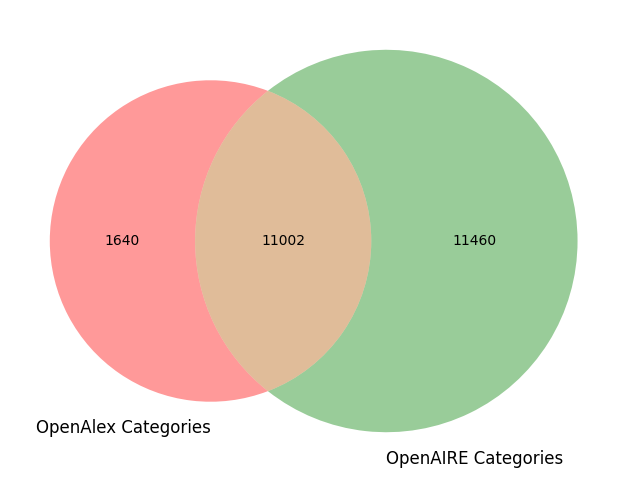

In [55]:
labels = ['OpenAlex Categories', 'OpenAIRE Categories']
common_categories_freq = openalex_categories_freq.intersection(openaire_categories_freq)

plt.figure(figsize=(8, 6))
venn = venn2(subsets=(len(openalex_categories_freq), len(openaire_categories_freq), len(common_categories_freq)), set_labels=labels)

# Add count of elements in each subset
venn.get_label_by_id('10').set_text(f"{len(openalex_categories_freq) - len(common_categories_freq)}")
venn.get_label_by_id('01').set_text(f"{len(openaire_categories_freq) - len(common_categories_freq)}")
venn.get_label_by_id('11').set_text(f"{len(common_categories_freq)}")

plt.show()

In [56]:
file_path = '../../data/openalex_categories_appeared_more_then_10_times.txt'

# Write the OpenAlex categories to the file, one per line
with open(file_path, 'w') as file:
    for category in openalex_categories_freq:
        file.write(f"{category}\n")

In [57]:
file_path = '../../data/openaire_categories_appeared_more_then_10_times.txt'

# Write the OpenAlex categories to the file, one per line
with open(file_path, 'w') as file:
    for category in openaire_categories_freq:
        file.write(f"{category}\n")

In [58]:
removed_openaire_cats = openaire_categories - openaire_categories_freq
removed_openalex_cats = openalex_categories - openalex_categories_freq

In [61]:
file_path = '../../data/openaire_categories_removed.txt'

# Write the OpenAlex categories to the file, one per line
with open(file_path, 'w') as file:
    for category in removed_openaire_cats:
        file.write(f"{category}\n")


In [62]:
file_path = '../../data/openalex_categories_removed.txt'

# Write the OpenAlex categories to the file, one per line
with open(file_path, 'w') as file:
    for category in removed_openalex_cats:
        file.write(f"{category}\n")